# Analyse the Influence of Outliers

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Models & Normalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


## Open the clean data

In [2]:
file_path = "Data/cleaned_house_sales.csv"

df_clean = pd.read_csv(file_path)
df_clean.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold,day_sold
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


## Analysing Prices

Text(0.5, 1.0, 'Histogram: price')

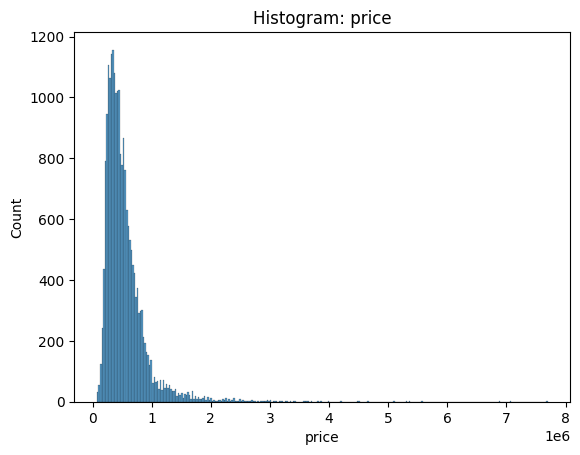

In [3]:
sns.histplot(df_clean.price)
plt.title("Histogram: price")

Text(0.5, 1.0, 'Boxplot: price')

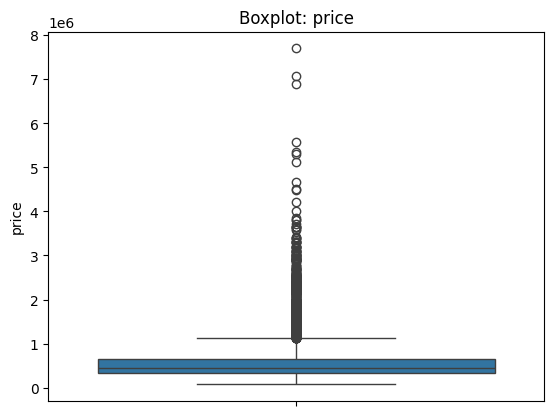

In [4]:
sns.boxplot(df_clean.price)
plt.title("Boxplot: price")

In [5]:
df_clean["price"].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [6]:
# 11 houses over 4 million
df_clean[df_clean.price > 4e6]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold,day_sold
1164,5110800.0,5,5.25,8010,45517,2.0,1,4,3,12,...,1999,0,98033,47.6767,-122.211,3430,26788,2014,10,20
1315,5300000.0,6,6.00,7390,24829,2.0,1,4,4,12,...,1991,0,98040,47.5631,-122.210,4320,24619,2015,4,13
1448,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,...,2009,0,98004,47.6232,-122.220,4600,21750,2015,4,13
2626,4500000.0,5,5.50,6640,40014,2.0,1,4,3,12,...,2004,0,98155,47.7493,-122.280,3030,23408,2014,8,15
3914,7062500.0,5,4.50,10040,37325,2.0,1,2,3,11,...,1940,2001,98004,47.6500,-122.214,3930,25449,2014,6,11
4411,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,...,2001,0,98039,47.6289,-122.233,3560,24345,2014,8,4
7252,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,...,1910,1987,98102,47.6298,-122.323,3940,8800,2014,10,13
8092,4668000.0,5,6.75,9640,13068,1.0,1,4,3,12,...,1983,2009,98040,47.5570,-122.210,3270,10454,2014,6,17
8638,4489000.0,4,3.00,6430,27517,2.0,0,0,3,12,...,2001,0,98004,47.6208,-122.219,3720,14592,2014,6,18
9254,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,...,2001,0,98039,47.6305,-122.240,4540,42730,2014,9,19


## How much of the data is represented by outliers? 

In [7]:
df_sorted = df_clean["price"].sort_values()

# Cumulative Quatiles
fig = px.ecdf(df_sorted, x="price", title="Cumulative Distribution of House Prices")

# Add a marker line at the 95th and 99th percentiles
fig.add_hline(y=0.95, line_dash="dot", annotation_text="95% of data", annotation_position="bottom right")
fig.show()

In [8]:
# quantiles
quantile_99 = df_clean.price.quantile(0.99)
quantile_95 = df_clean.price.quantile(0.95)

print("Quantile 99: ", quantile_99)
print("Quantile 95: ", quantile_95)


Quantile 99:  1964400.0000000051
Quantile 95:  1156479.9999999974


In [9]:
# Flag the datapoints inside each quantiles 99 and 95
df_clean["q_99"] = (df_clean.price < quantile_99).astype(int)
df_clean["q_95"] = (df_clean.price < quantile_95).astype(int)

df_clean.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold,day_sold,q_99,q_95
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,98178,47.5112,-122.257,1340,5650,2014,10,13,1,1
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,98125,47.7210,-122.319,1690,7639,2014,12,9,1,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,98028,47.7379,-122.233,2720,8062,2015,2,25,1,1
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,98136,47.5208,-122.393,1360,5000,2014,12,9,1,1
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,98074,47.6168,-122.045,1800,7503,2015,2,18,1,1


In [10]:
print(f"The 99th quantile exclude {df_clean.shape[0] - df_clean.q_99.sum()} datapoints")
print(f"The 95th quantile exclude {df_clean.shape[0] - df_clean.q_95.sum()} datapoints")

The 99th quantile exclude 217 datapoints
The 95th quantile exclude 1081 datapoints


## Sensitivity to outliers (metrics)

In [11]:
from utils import *

metrics_df = create_metrics_df()

### Random Forest flagging the outliers

In [12]:
# Split into train and test
seed = 13
# The price is the target variable
y = df_clean["price"]

# All other variables are the features for the baseline model
X = df_clean.drop(["price"], axis=1)

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [13]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold,day_sold,q_99,q_95
1571,4,1.50,2000,6778,1.0,0,0,4,7,1170,...,98198,47.3708,-122.311,1940,7531,2015,3,23,1,1
16330,4,2.50,2630,48706,2.0,0,0,3,8,2630,...,98072,47.7750,-122.125,2680,48706,2014,5,21,1,1
12786,4,2.50,2620,9525,2.5,0,0,4,9,2620,...,98040,47.5631,-122.219,2580,9525,2014,8,5,1,1
12524,3,2.50,1610,6000,2.0,0,0,4,7,1610,...,98038,47.3490,-122.036,1570,6000,2014,8,26,1,1
16179,3,1.00,880,18205,1.0,0,0,4,6,880,...,98178,47.5013,-122.244,1110,16115,2014,6,24,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,4,3.25,5180,19850,2.0,0,3,3,12,3540,...,98006,47.5620,-122.162,3160,9750,2015,4,1,0,0
866,3,2.50,3460,6590,2.0,0,0,3,7,3460,...,98056,47.4802,-122.188,2490,6312,2015,4,27,1,1
74,3,1.75,1790,50529,1.0,0,0,5,7,1090,...,98042,47.3511,-122.073,1940,50529,2015,3,16,1,1
14512,2,1.00,820,5040,1.0,0,0,3,7,820,...,98199,47.6498,-122.388,1730,5760,2014,8,20,1,1


In [14]:
# most common hyperparameters or the default ones
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(random_state=seed)#default values + random_state = 13
rf_regressor.fit(X_train, y_train)


metrics_df = add_new_metrics(metrics_df,
                             rf_regressor,
                             X_train,
                             y_train,
                             split = "train",
                             comments="Outliers flagging, no normalization.")

metrics_df = add_new_metrics(metrics_df,
                             rf_regressor,
                             X_test,
                             y_test,
                             split = "test",
                             comments="Outliers flagging, no normalization.")

In [15]:
metrics_df

,Model,Split,R2,Adjusted_R2,MAE,MAPE,RMSE,Comments
0,RandomForestRegressor,train,0.9879,0.9879,22769.7215,0.0456,40566.2303,"Outliers flagging, no normalization."
1,RandomForestRegressor,test,0.9322,0.9319,59863.8409,0.1203,93599.4998,"Outliers flagging, no normalization."


### Random Forest removing top 1% outliers

In [16]:
# Split into train and test
# The price is the target variable
y = df_clean[df_clean.q_99 == 1]["price"]

# All other variables are the features for the baseline model
X = df_clean[df_clean.q_99 == 1].drop(["price", "q_99", "q_95"], axis=1)

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [17]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold,day_sold
16385,3,1.50,1290,8175,1.0,0,0,4,7,820,...,1952,0,98004,47.6296,-122.205,2130,8577,2014,8,20
16816,3,2.00,1830,10873,1.0,0,0,3,8,1830,...,1989,0,98023,47.3066,-122.394,2490,8976,2014,7,31
6038,3,1.75,1840,8086,1.0,0,0,4,8,1840,...,1964,0,98052,47.6700,-122.155,1840,8060,2014,6,23
16785,3,1.75,1540,10545,2.0,0,0,4,6,1540,...,1978,0,98045,47.4451,-121.763,1540,10000,2015,3,11
15744,3,2.00,2090,15790,1.0,0,0,3,9,2090,...,1992,0,98034,47.7296,-122.199,1820,8770,2014,11,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3,1.00,1180,7669,1.0,0,0,4,7,1180,...,1967,0,98058,47.4479,-122.176,1190,7669,2014,7,28
878,3,1.00,1020,8100,1.0,0,0,3,7,1020,...,1954,0,98198,47.3586,-122.314,1020,8100,2014,12,19
75,4,4.00,3430,35102,2.0,0,0,4,10,2390,...,1986,0,98075,47.5822,-121.987,3240,35020,2014,11,5
14650,4,3.00,2530,5625,1.0,0,0,3,8,1470,...,1976,0,98034,47.7094,-122.233,1840,7070,2014,7,11


In [18]:
# most common hyperparameters or the default ones
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(random_state=seed)#default values + random_state = 13
rf_regressor.fit(X_train, y_train)


metrics_df = add_new_metrics(metrics_df,
                             rf_regressor,
                             X_train,
                             y_train,
                             split = "train",
                             comments="Removing top 1%, no normalization.")

metrics_df = add_new_metrics(metrics_df,
                             rf_regressor,
                             X_test,
                             y_test,
                             split = "test",
                             comments="Removing top 1%, no normalization.")

In [19]:
metrics_df

,Model,Split,R2,Adjusted_R2,MAE,MAPE,RMSE,Comments
0,RandomForestRegressor,train,0.9879,0.9879,22769.7215,0.0456,40566.2303,"Outliers flagging, no normalization."
1,RandomForestRegressor,test,0.9322,0.9319,59863.8409,0.1203,93599.4998,"Outliers flagging, no normalization."
2,RandomForestRegressor,train,0.9826,0.9826,23185.3777,0.0475,37273.0054,"Removing top 1%, no normalization."
3,RandomForestRegressor,test,0.8739,0.8733,64327.4972,0.1290,104088.2866,"Removing top 1%, no normalization."


### Random Forest removing top 5% outliers

In [20]:
# Split into train and test
# The price is the target variable
y = df_clean[df_clean.q_95 == 1]["price"]

# All other variables are the features for the baseline model
X = df_clean[df_clean.q_95 == 1].drop(["price", "q_99", "q_95"], axis=1)

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [21]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold,day_sold
7523,3,1.00,1200,7810,1.0,0,0,4,7,1200,...,1967,0,98038,47.3631,-122.050,1590,7800,2015,4,25
20438,4,2.50,3250,4500,2.0,0,0,3,8,3250,...,2008,0,98059,47.4944,-122.150,3030,4598,2014,11,4
8571,4,2.50,2180,3893,2.0,0,0,3,8,2180,...,1999,0,98117,47.6886,-122.388,1710,4550,2014,12,8
15677,3,1.75,1990,5600,1.0,0,1,3,8,1330,...,1941,0,98199,47.6500,-122.415,2630,6780,2014,9,3
8032,3,1.75,2360,4063,1.0,0,0,5,7,1180,...,1940,0,98117,47.6902,-122.382,1660,4063,2014,8,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,4,1.75,1760,11180,1.0,0,0,4,8,1760,...,1968,0,98059,47.4715,-122.118,1730,11180,2014,10,3
907,3,1.75,1410,9315,1.0,0,0,5,7,1410,...,1960,0,98031,47.3969,-122.198,1630,8250,2014,10,7
78,3,1.00,1410,5060,1.0,0,0,4,7,910,...,1956,0,98133,47.7073,-122.340,1130,5693,2014,6,9
15224,4,2.50,2570,8178,1.0,0,2,3,8,1710,...,1961,0,98118,47.5483,-122.261,2050,7500,2015,3,9


In [22]:
# most common hyperparameters or the default ones
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(random_state=seed)#default values + random_state = 13
rf_regressor.fit(X_train, y_train)


metrics_df = add_new_metrics(metrics_df,
                             rf_regressor,
                             X_train,
                             y_train,
                             split = "train",
                             comments="Removing top 5%, no normalization.")

metrics_df = add_new_metrics(metrics_df,
                             rf_regressor,
                             X_test,
                             y_test,
                             split = "test",
                             comments="Removing top 5%, no normalization.")

In [23]:
metrics_df

,Model,Split,R2,Adjusted_R2,MAE,MAPE,RMSE,Comments
0,RandomForestRegressor,train,0.9879,0.9879,22769.7215,0.0456,40566.2303,"Outliers flagging, no normalization."
1,RandomForestRegressor,test,0.9322,0.9319,59863.8409,0.1203,93599.4998,"Outliers flagging, no normalization."
2,RandomForestRegressor,train,0.9826,0.9826,23185.3777,0.0475,37273.0054,"Removing top 1%, no normalization."
3,RandomForestRegressor,test,0.8739,0.8733,64327.4972,0.1290,104088.2866,"Removing top 1%, no normalization."
4,RandomForestRegressor,train,0.9806,0.9806,19934.8930,0.0458,29386.2798,"Removing top 5%, no normalization."
5,RandomForestRegressor,test,0.8717,0.8710,53038.5069,0.1212,76308.9748,"Removing top 5%, no normalization."


### XGBoost flagging the outliers

In [24]:
# Split into train and test
seed = 13
# The price is the target variable
y = df_clean["price"]

# All other variables are the features for the baseline model
X = df_clean.drop(["price"], axis=1)

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [25]:
import xgboost as xgb

xgb_clf = xgb.XGBRegressor(seed = seed)
xgb_clf.fit(X_train, y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes

In [26]:
metrics_df = add_new_metrics(metrics_df,
                             xgb_clf,
                             X_train,
                             y_train,
                             split = "train",
                             comments="Outliers flagging, no normalization.")


metrics_df = add_new_metrics(metrics_df,
                             xgb_clf,
                             X_test,
                             y_test,
                             split = "test",
                             comments="Outliers flagging, no normalization.")

In [27]:
metrics_df

,Model,Split,R2,Adjusted_R2,MAE,MAPE,RMSE,Comments
0,RandomForestRegressor,train,0.9879,0.9879,22769.7215,0.0456,40566.2303,"Outliers flagging, no normalization."
1,RandomForestRegressor,test,0.9322,0.9319,59863.8409,0.1203,93599.4998,"Outliers flagging, no normalization."
2,RandomForestRegressor,train,0.9826,0.9826,23185.3777,0.0475,37273.0054,"Removing top 1%, no normalization."
3,RandomForestRegressor,test,0.8739,0.8733,64327.4972,0.1290,104088.2866,"Removing top 1%, no normalization."
4,RandomForestRegressor,train,0.9806,0.9806,19934.8930,0.0458,29386.2798,"Removing top 5%, no normalization."
5,RandomForestRegressor,test,0.8717,0.8710,53038.5069,0.1212,76308.9748,"Removing top 5%, no normalization."
6,XGBRegressor,train,0.9825,0.9825,35584.0027,0.0818,48751.1351,"Outliers flagging, no normalization."
7,XGBRegressor,test,0.9260,0.9256,59532.0485,0.1184,97798.9764,"Outliers flagging, no normalization."


### XGBoost removing top 1% 

In [28]:
# Split into train and test
# The price is the target variable
y = df_clean[df_clean.q_99 == 1]["price"]

# All other variables are the features for the baseline model
X = df_clean[df_clean.q_99 == 1].drop(["price", "q_99", "q_95"], axis=1)

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [29]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold,day_sold
16385,3,1.50,1290,8175,1.0,0,0,4,7,820,...,1952,0,98004,47.6296,-122.205,2130,8577,2014,8,20
16816,3,2.00,1830,10873,1.0,0,0,3,8,1830,...,1989,0,98023,47.3066,-122.394,2490,8976,2014,7,31
6038,3,1.75,1840,8086,1.0,0,0,4,8,1840,...,1964,0,98052,47.6700,-122.155,1840,8060,2014,6,23
16785,3,1.75,1540,10545,2.0,0,0,4,6,1540,...,1978,0,98045,47.4451,-121.763,1540,10000,2015,3,11
15744,3,2.00,2090,15790,1.0,0,0,3,9,2090,...,1992,0,98034,47.7296,-122.199,1820,8770,2014,11,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3,1.00,1180,7669,1.0,0,0,4,7,1180,...,1967,0,98058,47.4479,-122.176,1190,7669,2014,7,28
878,3,1.00,1020,8100,1.0,0,0,3,7,1020,...,1954,0,98198,47.3586,-122.314,1020,8100,2014,12,19
75,4,4.00,3430,35102,2.0,0,0,4,10,2390,...,1986,0,98075,47.5822,-121.987,3240,35020,2014,11,5
14650,4,3.00,2530,5625,1.0,0,0,3,8,1470,...,1976,0,98034,47.7094,-122.233,1840,7070,2014,7,11


In [30]:
import xgboost as xgb

xgb_clf = xgb.XGBRegressor(seed = seed)
xgb_clf.fit(X_train, y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes

In [31]:
metrics_df = add_new_metrics(metrics_df,
                             xgb_clf,
                             X_train,
                             y_train,
                             split = "train",
                             comments="Removing top 1%, no normalization.")


metrics_df = add_new_metrics(metrics_df,
                             xgb_clf,
                             X_test,
                             y_test,
                             split = "test",
                             comments="Removing top 1%, no normalization.")

In [32]:
metrics_df

,Model,Split,R2,Adjusted_R2,MAE,MAPE,RMSE,Comments
0,RandomForestRegressor,train,0.9879,0.9879,22769.7215,0.0456,40566.2303,"Outliers flagging, no normalization."
1,RandomForestRegressor,test,0.9322,0.9319,59863.8409,0.1203,93599.4998,"Outliers flagging, no normalization."
2,RandomForestRegressor,train,0.9826,0.9826,23185.3777,0.0475,37273.0054,"Removing top 1%, no normalization."
3,RandomForestRegressor,test,0.8739,0.8733,64327.4972,0.1290,104088.2866,"Removing top 1%, no normalization."
4,RandomForestRegressor,train,0.9806,0.9806,19934.8930,0.0458,29386.2798,"Removing top 5%, no normalization."
5,RandomForestRegressor,test,0.8717,0.8710,53038.5069,0.1212,76308.9748,"Removing top 5%, no normalization."
6,XGBRegressor,train,0.9825,0.9825,35584.0027,0.0818,48751.1351,"Outliers flagging, no normalization."
7,XGBRegressor,test,0.9260,0.9256,59532.0485,0.1184,97798.9764,"Outliers flagging, no normalization."
8,XGBRegressor,train,0.9679,0.9679,36410.9174,0.0830,50584.7096,"Removing top 1%, no normalization."
9,XGBRegressor,test,0.8891,0.8885,61265.8381,0.1234,97618.3705,"Removing top 1%, no normalization."


### XGBoost removing top 5% 

In [33]:
# Split into train and test
# The price is the target variable
y = df_clean[df_clean.q_95 == 1]["price"]

# All other variables are the features for the baseline model
X = df_clean[df_clean.q_95 == 1].drop(["price", "q_99", "q_95"], axis=1)

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [34]:
import xgboost as xgb

xgb_clf = xgb.XGBRegressor(seed = seed)
xgb_clf.fit(X_train, y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes

In [35]:
metrics_df = add_new_metrics(metrics_df,
                             xgb_clf,
                             X_train,
                             y_train,
                             split = "train",
                             comments="Removing top 5%, no normalization.")


metrics_df = add_new_metrics(metrics_df,
                             xgb_clf,
                             X_test,
                             y_test,
                             split = "test",
                             comments="Removing top 5%, no normalization.")

In [36]:
metrics_df

,Model,Split,R2,Adjusted_R2,MAE,MAPE,RMSE,Comments
0,RandomForestRegressor,train,0.9879,0.9879,22769.7215,0.0456,40566.2303,"Outliers flagging, no normalization."
1,RandomForestRegressor,test,0.9322,0.9319,59863.8409,0.1203,93599.4998,"Outliers flagging, no normalization."
2,RandomForestRegressor,train,0.9826,0.9826,23185.3777,0.0475,37273.0054,"Removing top 1%, no normalization."
3,RandomForestRegressor,test,0.8739,0.8733,64327.4972,0.1290,104088.2866,"Removing top 1%, no normalization."
4,RandomForestRegressor,train,0.9806,0.9806,19934.8930,0.0458,29386.2798,"Removing top 5%, no normalization."
5,RandomForestRegressor,test,0.8717,0.8710,53038.5069,0.1212,76308.9748,"Removing top 5%, no normalization."
6,XGBRegressor,train,0.9825,0.9825,35584.0027,0.0818,48751.1351,"Outliers flagging, no normalization."
7,XGBRegressor,test,0.9260,0.9256,59532.0485,0.1184,97798.9764,"Outliers flagging, no normalization."
8,XGBRegressor,train,0.9679,0.9679,36410.9174,0.0830,50584.7096,"Removing top 1%, no normalization."
9,XGBRegressor,test,0.8891,0.8885,61265.8381,0.1234,97618.3705,"Removing top 1%, no normalization."


The feature flagging for both 99% and 95% worked better than removing the outliers, which means that the information about the top priced houses is still important
to accurately predict the prices. In that sense, we will continue the analysis using the flagging of the columns instead of dropping them.

### Export dataset and metrics

In [41]:
filename_metrics = "Metrics/outlier_analysis_metrics.csv"

metrics_df.to_csv(filename_metrics, index = False)

In [38]:
df_clean

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold,day_sold,q_99,q_95
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,98178,47.5112,-122.257,1340,5650,2014,10,13,1,1
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,98125,47.7210,-122.319,1690,7639,2014,12,9,1,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,98028,47.7379,-122.233,2720,8062,2015,2,25,1,1
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,98136,47.5208,-122.393,1360,5000,2014,12,9,1,1
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,98074,47.6168,-122.045,1800,7503,2015,2,18,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,...,98103,47.6993,-122.346,1530,1509,2014,5,21,1,1
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,...,98146,47.5107,-122.362,1830,7200,2015,2,23,1,1
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,...,98144,47.5944,-122.299,1020,2007,2014,6,23,1,1
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,...,98027,47.5345,-122.069,1410,1287,2015,1,16,1,1


In [42]:
filename_data = "Data/v1_house_sales.csv"

df_clean.to_csv(filename_data, index = False)